In [2]:
import pandas as pd
import datetime 
import holidays
from collections import ChainMap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [3]:
data_cleaned=pd.read_csv("dati_con_fest.csv", index_col=0, parse_dates=True, squeeze=True)
data_cleaned["Date"]= pd.to_datetime(data_cleaned["Date"])

In [4]:
data_cleaned

,Date,Vendite_1,Scontrini_1,Vendite_2,Scontrini_2,Vendite_3,Scontrini_3,Vendite_4,Scontrini_4,Vendite_5,Scontrini_5,Vendite_6,Scontrini_6,week_day,Holidays
1,2017-01-01,7627.12,866,9409.06,911,0.00,0,0.00,0,4841.05,596,0.00,0,Sunday,Capodanno
2,2017-01-02,6987.16,816,7403.93,735,0.00,0,2621.02,641,5388.64,706,0.00,0,Monday,0
3,2017-01-03,6480.88,743,7213.36,723,0.00,0,2656.17,566,4973.78,697,0.00,0,Tuesday,0
4,2017-01-04,6601.46,766,8322.75,853,0.00,0,2595.82,568,4911.55,661,0.00,0,Wednesday,0
5,2017-01-05,8447.41,982,8188.21,799,0.00,0,2926.33,605,5622.54,755,0.00,0,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,2021-04-08,3779.84,351,5998.35,478,5146.67,487,2255.51,348,4898.70,435,4539.47,437,Thursday,0
1560,2021-04-09,4368.67,361,7806.44,589,7222.84,584,3320.59,425,6244.44,511,6360.96,545,Friday,0
1561,2021-04-10,4772.16,391,8386.84,544,8529.51,597,3413.86,482,7045.61,513,6555.61,530,Saturday,0
1562,2021-04-11,3413.91,289,6727.20,451,5278.47,409,2475.71,325,4883.18,413,4923.76,425,Sunday,0


C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

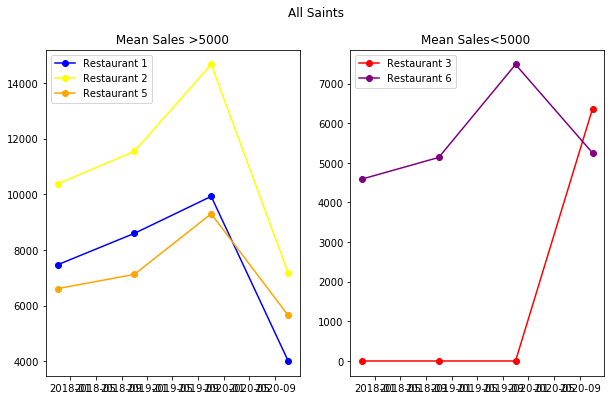

In [5]:
#Primo Novembre
primonov=data_cleaned[data_cleaned["Holidays"]=="Tutti i Santi"]
primonov_1=primonov[["Date","Vendite_1"]]
primonov_2=primonov[["Date","Vendite_2"]]
primonov_3=primonov[["Date","Vendite_3"]]
primonov_5=primonov[["Date","Vendite_5"]]
primonov_6=primonov[["Date","Vendite_6"]] #il 4 è chiuso


#plottiamo in due grafici separati i ristoranti con guadagno non festivo medio <6000 e i un altro quelli >6000
#sales non festive>6000
#plt.figure(figsize=(8,9), dpi=80)
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot( 'Date', 'Vendite_1', data=primonov_1, marker='o', color='blue',label="Restaurant 1")
ax[0].plot( 'Date', 'Vendite_2', data=primonov_2, marker='o', color='yellow',label="Restaurant 2")
ax[0].plot( 'Date', 'Vendite_5', data=primonov_5, marker='o', color='orange',label="Restaurant 5")
ax[0].set_title(" Mean Sales >5000 ")
ax[0].legend()


ax[1].plot( 'Date', 'Vendite_3', data=primonov_3, marker='o', color='red',label="Restaurant 3")
ax[1].plot( 'Date', 'Vendite_6', data=primonov_6, marker='o', color='purple',label="Restaurant 6")
plt.title("Mean Sales<5000 ")
plt.legend()

fig.suptitle("All Saints")
plt.show()


C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is de

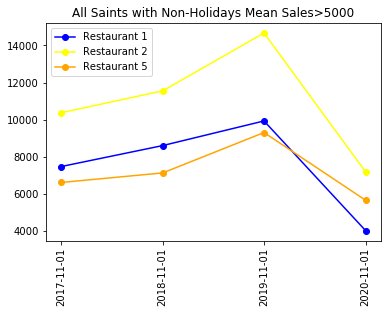

In [6]:
plt.plot( 'Date', 'Vendite_1', data=primonov_1, marker='o', color='blue',label="Restaurant 1")
plt.plot( 'Date', 'Vendite_2', data=primonov_2, marker='o', color='yellow',label="Restaurant 2")
plt.plot( 'Date', 'Vendite_5', data=primonov_5, marker='o', color='orange',label="Restaurant 5")
plt.title("All Saints with Non-Holidays Mean Sales>5000")
plt.xticks(primonov_1["Date"], rotation="vertical")
plt.legend()
plt.show()

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

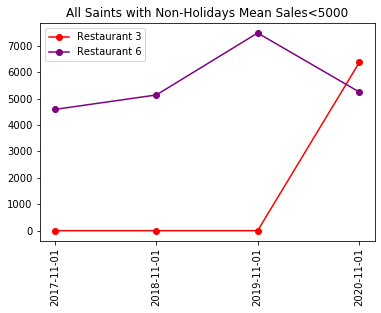

In [7]:
plt.plot( 'Date', 'Vendite_3', data=primonov_3, marker='o', color='red',label="Restaurant 3")
plt.plot( 'Date', 'Vendite_6', data=primonov_6, marker='o', color='purple',label="Restaurant 6")
plt.title("All Saints with Non-Holidays Mean Sales<5000")
plt.xticks(primonov_1["Date"], rotation="vertical")
plt.legend()
plt.show()

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

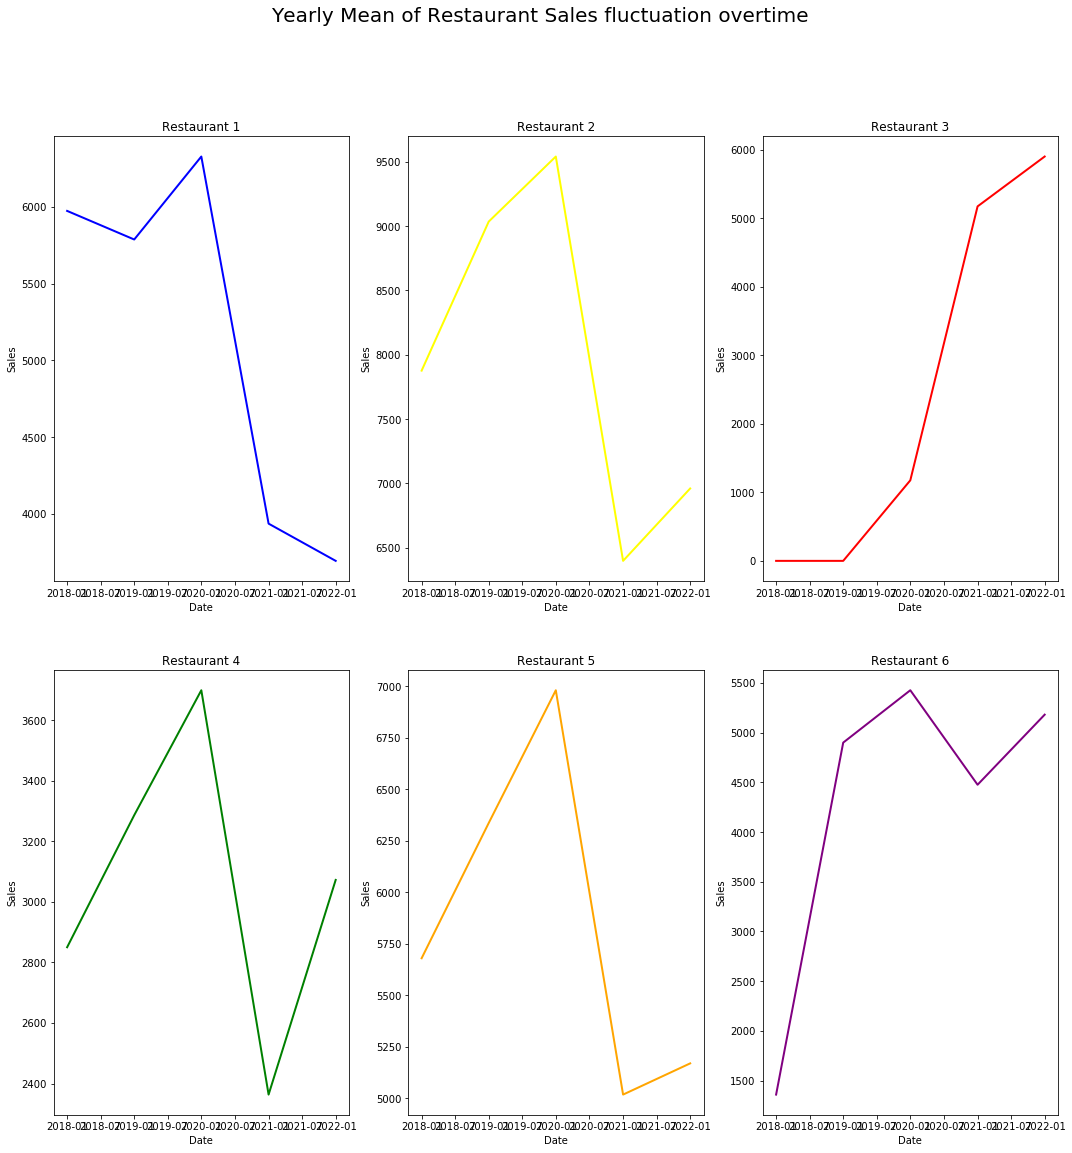

In [8]:
# Make a data frame
df=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
checkin_year_sigma = df.groupby(pd.Grouper(key="x_values",freq='1Y')).mean()
df1=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_2"]})
checkin_year_sigma_1 = df1.groupby(pd.Grouper(key="x_values",freq='1Y')).mean()
df2=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_3"]})
checkin_year_sigma_2 = df2.groupby(pd.Grouper(key="x_values",freq='1Y')).mean()
df3=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_4"]})
checkin_year_sigma_3 = df3.groupby(pd.Grouper(key="x_values",freq='1Y')).mean()
df4=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_5"]})
checkin_year_sigma_4 = df4.groupby(pd.Grouper(key="x_values",freq='1Y')).mean()
df5=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_6"]})
checkin_year_sigma_5 = df5.groupby(pd.Grouper(key="x_values",freq='1Y')).mean()



# Draw line chart with dashed line
fig, ax = plt.subplots(2, 3,figsize=(18,18))
ax[0,0].plot(checkin_year_sigma.index, checkin_year_sigma.y_values,  color='blue',linewidth=2)
ax[0,0].set_title('Restaurant 1')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Sales')

ax[0,1].plot(checkin_year_sigma_1.index, checkin_year_sigma_1.y_values, color='yellow',linewidth=2)
ax[0,1].set_title('Restaurant 2')
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Sales')

ax[0,2].plot(checkin_year_sigma_2.index, checkin_year_sigma_2.y_values,linewidth=2, color='red')
ax[0,2].set_title('Restaurant 3')
ax[0,2].set_xlabel('Date')
ax[0,2].set_ylabel('Sales')

ax[1,0].plot(checkin_year_sigma_3.index, checkin_year_sigma_3.y_values,linewidth=2, color='green')
ax[1,0].set_title('Restaurant 4')
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Sales')

ax[1,1].plot(checkin_year_sigma_4.index, checkin_year_sigma_4.y_values,linewidth=2, color='orange')
ax[1,1].set_title('Restaurant 5')
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Sales')

ax[1,2].plot(checkin_year_sigma_5.index, checkin_year_sigma_5.y_values,linewidth=2, color='purple')
ax[1,2].set_title('Restaurant 6')
ax[1,2].set_xlabel('Date')
ax[1,2].set_ylabel('Sales')
 
# Add titles
fig.suptitle('Yearly Mean of Restaurant Sales fluctuation overtime', fontsize=20)

# Show the graph
plt.show()
fig.savefig('yearlymean.png')

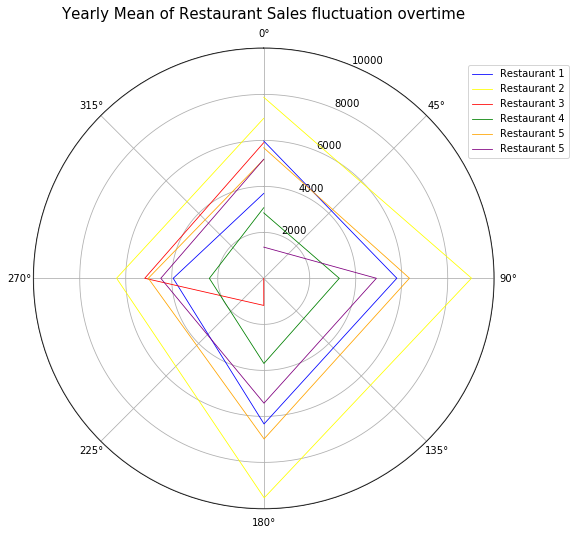

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t1 = mdates.date2num(checkin_year_sigma.index.to_pydatetime())
y1 = checkin_year_sigma["y_values"]
t1norm = (t1-t1.min())/(t1.max()-t1.min())*2.*np.pi
#ax.fill_between(tnorm,y ,0, alpha=0.4)
ax.plot(t1norm,y1 , linewidth=0.8,color="blue", label="Restaurant 1")


t2 = mdates.date2num(checkin_year_sigma_1.index.to_pydatetime())
y2 = checkin_year_sigma_1["y_values"]
t2norm = (t2-t2.min())/(t2.max()-t2.min())*2.*np.pi
ax.plot(t2norm,y2 , linewidth=0.8,color="yellow", label="Restaurant 2")

t3 = mdates.date2num(checkin_year_sigma_2.index.to_pydatetime())
y3 = checkin_year_sigma_2["y_values"]
t3norm = (t3-t3.min())/(t3.max()-t3.min())*2.*np.pi
ax.plot(t3norm,y3 , linewidth=0.8,color="red", label="Restaurant 3")

t4 = mdates.date2num(checkin_year_sigma_3.index.to_pydatetime())
y4 = checkin_year_sigma_3["y_values"]
t4norm = (t4-t4.min())/(t4.max()-t4.min())*2.*np.pi
ax.plot(t4norm,y4 , linewidth=0.8,color="green", label="Restaurant 4")

t5 = mdates.date2num(checkin_year_sigma_4.index.to_pydatetime())
y5 = checkin_year_sigma_4["y_values"]
t5norm = (t5-t5.min())/(t5.max()-t5.min())*2.*np.pi
ax.plot(t5norm,y5 , linewidth=0.8,color="orange", label="Restaurant 5")

t6 = mdates.date2num(checkin_year_sigma_5.index.to_pydatetime())
y6 = checkin_year_sigma_5["y_values"]
t6norm = (t6-t6.min())/(t6.max()-t6.min())*2.*np.pi
ax.plot(t6norm,y6 , linewidth=0.8,color="purple", label="Restaurant 5")

# Add titles
plt.title("Yearly Mean of Restaurant Sales fluctuation overtime", fontsize=15)
angle = np.deg2rad(30)
plt.legend(loc="lower left",bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.show()



C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is de

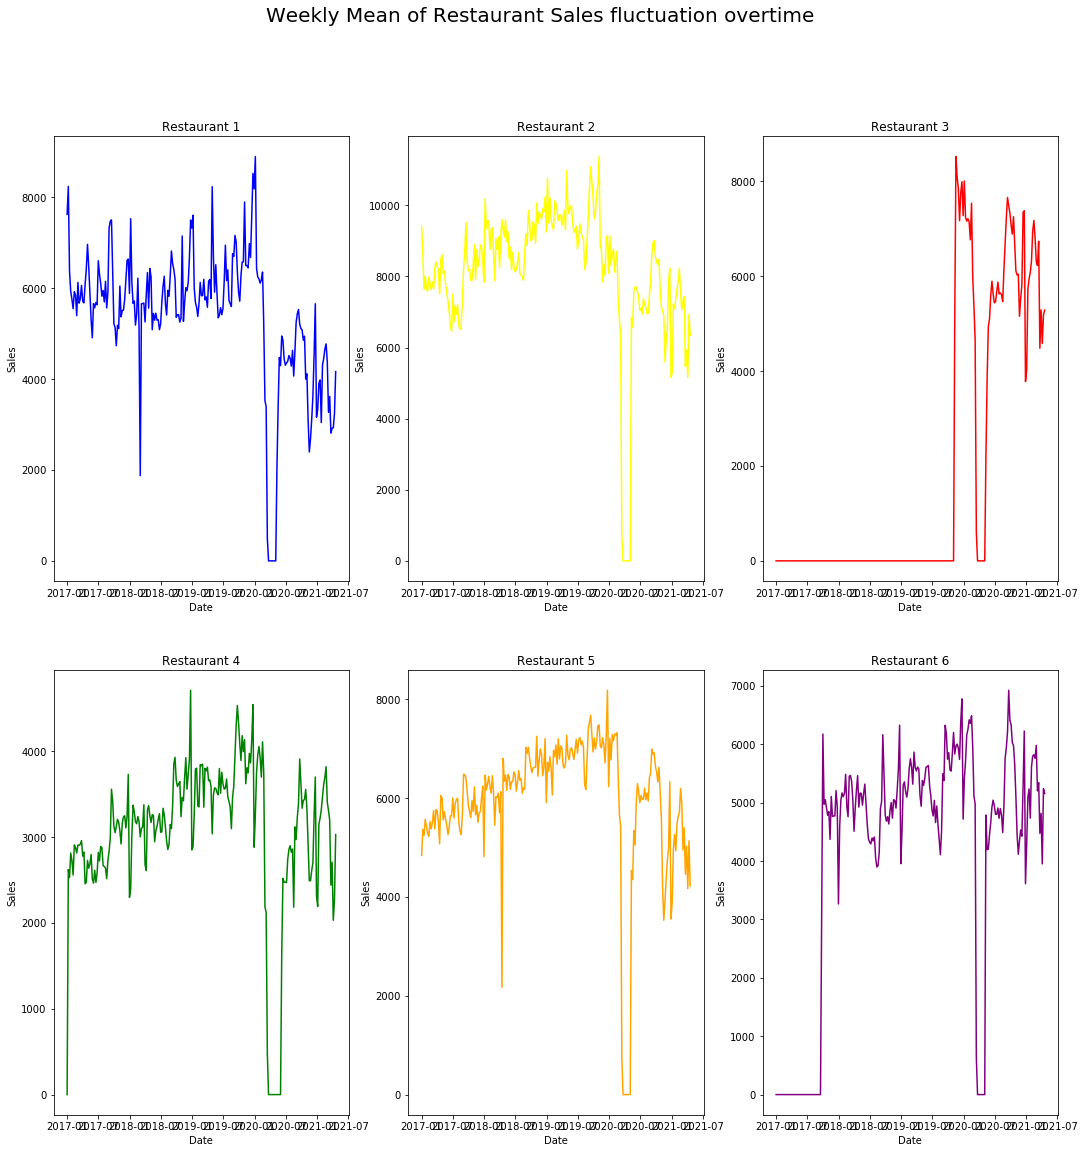

In [10]:
# Make a data frame
df=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
checkin_year_sigma = df.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df1=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_2"]})
checkin_year_sigma_1 = df1.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df2=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_3"]})
checkin_year_sigma_2 = df2.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df3=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_4"]})
checkin_year_sigma_3 = df3.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df4=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_5"]})
checkin_year_sigma_4 = df4.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df5=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_6"]})
checkin_year_sigma_5 = df5.groupby(pd.Grouper(key="x_values",freq='1W')).mean()



# Draw line chart with dashed line
fig, ax = plt.subplots(2, 3,figsize=(18,18))
ax[0,0].plot(checkin_year_sigma.index, checkin_year_sigma.y_values, color='blue')
ax[0,0].set_title('Restaurant 1')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Sales')

ax[0,1].plot(checkin_year_sigma_1.index, checkin_year_sigma_1.y_values, color='yellow')
ax[0,1].set_title('Restaurant 2')
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Sales')

ax[0,2].plot(checkin_year_sigma_2.index, checkin_year_sigma_2.y_values, color='red')
ax[0,2].set_title('Restaurant 3')
ax[0,2].set_xlabel('Date')
ax[0,2].set_ylabel('Sales')

ax[1,0].plot(checkin_year_sigma_3.index, checkin_year_sigma_3.y_values, color='green')
ax[1,0].set_title('Restaurant 4')
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Sales')

ax[1,1].plot(checkin_year_sigma_4.index, checkin_year_sigma_4.y_values, color='orange')
ax[1,1].set_title('Restaurant 5')
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Sales')

ax[1,2].plot(checkin_year_sigma_5.index, checkin_year_sigma_5.y_values, color='purple')
ax[1,2].set_title('Restaurant 6')
ax[1,2].set_xlabel('Date')
ax[1,2].set_ylabel('Sales')
 
# Add titles
fig.suptitle('Weekly Mean of Restaurant Sales fluctuation overtime', fontsize=20)

# Show the graph
plt.show()
fig.savefig('weekly_mean.png',bbox_inches='tight')

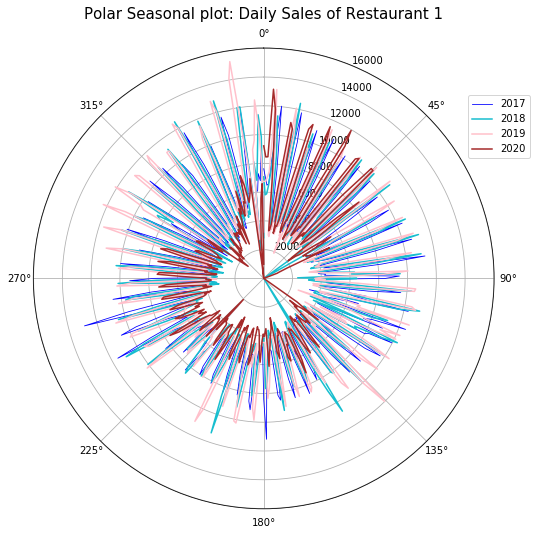

In [11]:
df=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
checkin_year_sigma = df.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df=df.set_index("x_values")
R1_2017=df[df.index.year==2017]
R1_2018=df[df.index.year==2018]
R1_2019=df[df.index.year==2019]
R1_2020=df[df.index.year==2020]
R1_2021=df[df.index.year==2021]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t1 = mdates.date2num(R1_2017.index.to_pydatetime())
y1 = R1_2017["y_values"]
t1norm = (t1-t1.min())/(t1.max()-t1.min())*2.*np.pi
ax.plot(t1norm,y1,linewidth=0.8,color="blue", label="2017")

t2 = mdates.date2num(R1_2018.index.to_pydatetime())
y2 = R1_2018["y_values"]
t2norm = (t2-t2.min())/(t2.max()-t2.min())*2.*np.pi
ax.plot(t2norm,y2 , color="tab:cyan", label="2018")

t3 = mdates.date2num(R1_2019.index.to_pydatetime())
y3 = R1_2019["y_values"]
t3norm = (t3-t3.min())/(t3.max()-t3.min())*2.*np.pi
ax.plot(t3norm,y3 ,color="pink", label="2019")

t4 = mdates.date2num(R1_2020.index.to_pydatetime())
y4 = R1_2020["y_values"]
t4norm = (t4-t4.min())/(t4.max()-t4.min())*2.*np.pi
ax.plot(t4norm,y4 ,color="brown", label="2020")

#t5 = mdates.date2num(R1_2021.index.to_pydatetime())
#y5 = R1_2021["y_values"]
#t5norm = (t5-t5.min())/(t5.max()-t5.min())*2.*np.pi
#ax.plot(t5norm,y5 , linewidth=0.8,color="black", label="2021")

# Add titles
plt.title("Polar Seasonal plot: Daily Sales of Restaurant 1", fontsize=15)
angle = np.deg2rad(30)
plt.legend(loc="lower left",bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.show()

fig.savefig('polar_reasonal_rest_1_overall.png',bbox_inches='tight')



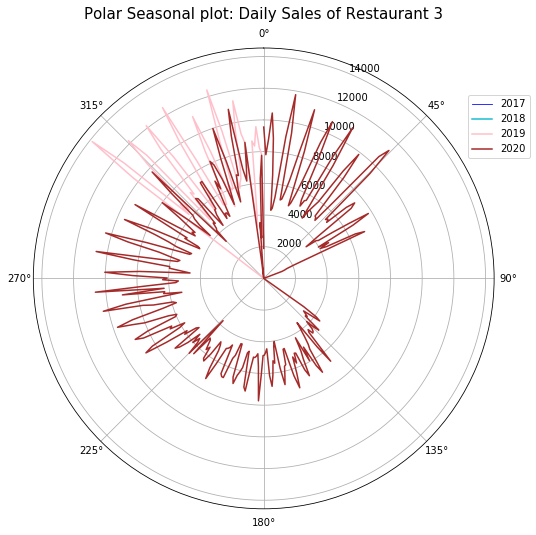

In [12]:
#Restaurant 3
df3=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_3"]})
checkin_year_sigma_2 = df3.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df3=df3.set_index("x_values")
R3_2017=df3[df3.index.year==2017]
R3_2018=df3[df3.index.year==2018]
R3_2019=df3[df3.index.year==2019]
R3_2020=df3[df3.index.year==2020]
R3_2021=df3[df3.index.year==2021]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t1 = mdates.date2num(R3_2017.index.to_pydatetime())
y1 = R3_2017["y_values"]
t1norm = (t1-t1.min())/(t1.max()-t1.min())*2.*np.pi
ax.plot(t1norm,y1,linewidth=0.8,color="blue", label="2017")

t2 = mdates.date2num(R3_2018.index.to_pydatetime())
y2 = R3_2018["y_values"]
t2norm = (t2-t2.min())/(t2.max()-t2.min())*2.*np.pi
ax.plot(t2norm,y2 , color="tab:cyan", label="2018")

t3 = mdates.date2num(R3_2019.index.to_pydatetime())
y3 = R3_2019["y_values"]
t3norm = (t3-t3.min())/(t3.max()-t3.min())*2.*np.pi
ax.plot(t3norm,y3 ,color="pink", label="2019")

t4 = mdates.date2num(R3_2020.index.to_pydatetime())
y4 = R3_2020["y_values"]
t4norm = (t4-t4.min())/(t4.max()-t4.min())*2.*np.pi
ax.plot(t4norm,y4 ,color="brown", label="2020")

#t5 = mdates.date2num(R3_2021.index.to_pydatetime())
#y5 = R3_2021["y_values"]
#t5norm = (t5-t5.min())/(t5.max()-t5.min())*2.*np.pi
#ax.plot(t5norm,y5 , linewidth=0.8,color="black", label="2021")

# Add titles
plt.title("Polar Seasonal plot: Daily Sales of Restaurant 3", fontsize=15)
angle = np.deg2rad(30)
plt.legend(loc="lower left",bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.show()

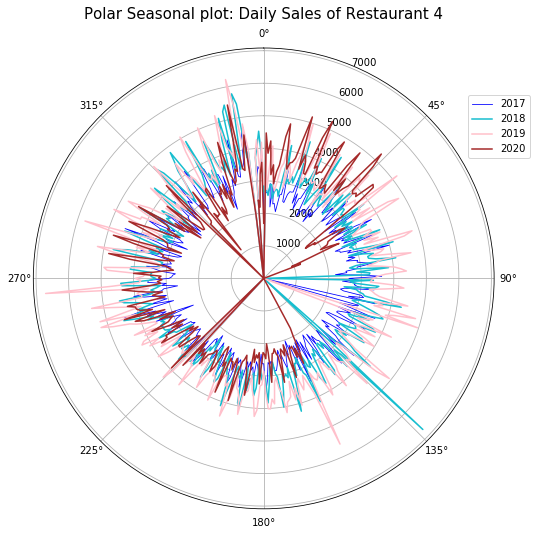

In [13]:
#Restaurant 4
df4=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_4"]})
checkin_year_sigma_3 = df4.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df4=df4.set_index("x_values")
R4_2017=df4[df4.index.year==2017]
R4_2018=df4[df4.index.year==2018]
R4_2019=df4[df4.index.year==2019]
R4_2020=df4[df4.index.year==2020]
R4_2021=df4[df4.index.year==2021]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t1 = mdates.date2num(R4_2017.index.to_pydatetime())
y1 = R4_2017["y_values"]
t1norm = (t1-t1.min())/(t1.max()-t1.min())*2.*np.pi
ax.plot(t1norm,y1,linewidth=0.8,color="blue", label="2017")

t2 = mdates.date2num(R4_2018.index.to_pydatetime())
y2 = R4_2018["y_values"]
t2norm = (t2-t2.min())/(t2.max()-t2.min())*2.*np.pi
ax.plot(t2norm,y2 , color="tab:cyan", label="2018")

t3 = mdates.date2num(R4_2019.index.to_pydatetime())
y3 = R4_2019["y_values"]
t3norm = (t3-t3.min())/(t3.max()-t3.min())*2.*np.pi
ax.plot(t3norm,y3 ,color="pink", label="2019")

t4 = mdates.date2num(R4_2020.index.to_pydatetime())
y4 = R4_2020["y_values"]
t4norm = (t4-t4.min())/(t4.max()-t4.min())*2.*np.pi
ax.plot(t4norm,y4 ,color="brown", label="2020")

#t5 = mdates.date2num(R4_2021.index.to_pydatetime())
#y5 = R4_2021["y_values"]
#t5norm = (t5-t5.min())/(t5.max()-t5.min())*2.*np.pi
#ax.plot(t5norm,y5 , linewidth=0.8,color="black", label="2021")

# Add titles
plt.title("Polar Seasonal plot: Daily Sales of Restaurant 4", fontsize=15)
angle = np.deg2rad(30)
plt.legend(loc="lower left",bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.show()

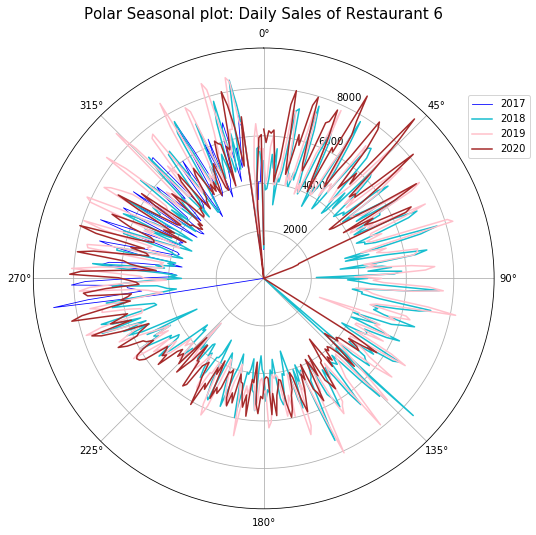

In [14]:
#Restaurant 6
df6=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_6"]})
checkin_year_sigma_5 = df6.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df6=df6.set_index("x_values")
R6_2017=df6[df6.index.year==2017]
R6_2018=df6[df6.index.year==2018]
R6_2019=df6[df6.index.year==2019]
R6_2020=df6[df6.index.year==2020]
R6_2021=df6[df6.index.year==2021]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t1 = mdates.date2num(R6_2017.index.to_pydatetime())
y1 = R6_2017["y_values"]
t1norm = (t1-t1.min())/(t1.max()-t1.min())*2.*np.pi
ax.plot(t1norm,y1,linewidth=0.8,color="blue", label="2017")

t2 = mdates.date2num(R6_2018.index.to_pydatetime())
y2 = R6_2018["y_values"]
t2norm = (t2-t2.min())/(t2.max()-t2.min())*2.*np.pi
ax.plot(t2norm,y2 , color="tab:cyan", label="2018")

t3 = mdates.date2num(R6_2019.index.to_pydatetime())
y3 = R6_2019["y_values"]
t3norm = (t3-t3.min())/(t3.max()-t3.min())*2.*np.pi
ax.plot(t3norm,y3 ,color="pink", label="2019")

t4 = mdates.date2num(R6_2020.index.to_pydatetime())
y4 = R6_2020["y_values"]
t4norm = (t4-t4.min())/(t4.max()-t4.min())*2.*np.pi
ax.plot(t4norm,y4 ,color="brown", label="2020")

#t5 = mdates.date2num(R6_2021.index.to_pydatetime())
#y5 = R6_2021["y_values"]
#t5norm = (t5-t5.min())/(t5.max()-t5.min())*2.*np.pi
#ax.plot(t5norm,y5 , linewidth=0.8,color="black", label="2021")

# Add titles
plt.title("Polar Seasonal plot: Daily Sales of Restaurant 6", fontsize=15)
angle = np.deg2rad(30)
plt.legend(loc="lower left",bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.show()

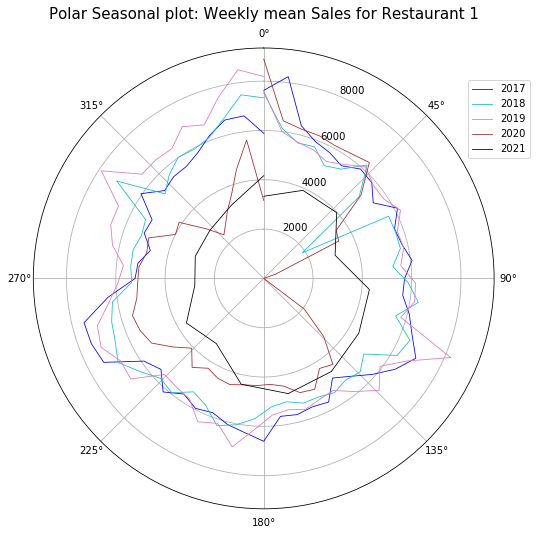

In [15]:
df=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
checkin_year_sigma = df.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
R1_2017=checkin_year_sigma[checkin_year_sigma.index.year==2017]
R1_2018=checkin_year_sigma[checkin_year_sigma.index.year==2018]
R1_2019=checkin_year_sigma[checkin_year_sigma.index.year==2019]
R1_2020=checkin_year_sigma[checkin_year_sigma.index.year==2020]
R1_2021=checkin_year_sigma[checkin_year_sigma.index.year==2021]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t1 = mdates.date2num(R1_2017.index.to_pydatetime())
y1 = R1_2017["y_values"]
t1norm = (t1-t1.min())/(t1.max()-t1.min())*2.*np.pi
ax.plot(t1norm,y1 , linewidth=0.8,color="blue", label="2017")

t2 = mdates.date2num(R1_2018.index.to_pydatetime())
y2 = R1_2018["y_values"]
t2norm = (t2-t2.min())/(t2.max()-t2.min())*2.*np.pi
ax.plot(t2norm,y2 , linewidth=0.8,color="tab:cyan", label="2018")

t3 = mdates.date2num(R1_2019.index.to_pydatetime())
y3 = R1_2019["y_values"]
t3norm = (t3-t3.min())/(t3.max()-t3.min())*2.*np.pi
ax.plot(t3norm,y3 , linewidth=0.8,color="tab:pink", label="2019")

t4 = mdates.date2num(R1_2020.index.to_pydatetime())
y4 = R1_2020["y_values"]
t4norm = (t4-t4.min())/(t4.max()-t4.min())*2.*np.pi
ax.plot(t4norm,y4 , linewidth=0.8,color="brown", label="2020")

t5 = mdates.date2num(R1_2021.index.to_pydatetime())
y5 = R1_2021["y_values"]
t5norm = (t5-t5.min())/(t5.max()-t5.min())*2.*np.pi
ax.plot(t5norm,y5 , linewidth=0.8,color="black", label="2021")

# Add titles
plt.title("Polar Seasonal plot: Weekly mean Sales for Restaurant 1", fontsize=15)
angle = np.deg2rad(30)
plt.legend(loc="lower left",bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.show()

fig.savefig('polar_reasonal_rest_1.png',bbox_inches='tight')



In [16]:
from matplotlib import pyplot
series = pd.read_csv('dati_con_fest.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.columns


Index(['Date', 'Vendite_1', 'Scontrini_1', 'Vendite_2', 'Scontrini_2',
       'Vendite_3', 'Scontrini_3', 'Vendite_4', 'Scontrini_4', 'Vendite_5',
       'Scontrini_5', 'Vendite_6', 'Scontrini_6', 'week_day', 'Holidays'],
      dtype='object')

In [17]:
series_1=series[['Date', 'Vendite_1', 'Scontrini_1','week_day', 'Holidays']]
series_2=series[['Date', 'Vendite_2', 'Scontrini_2','week_day', 'Holidays']]
series_3=series[['Date', 'Vendite_3', 'Scontrini_3','week_day', 'Holidays']]
series_4=series[['Date', 'Vendite_4', 'Scontrini_4','week_day', 'Holidays']]
series_5=series[['Date', 'Vendite_5', 'Scontrini_5','week_day', 'Holidays']]
series_6=series[['Date', 'Vendite_6', 'Scontrini_6','week_day', 'Holidays']]


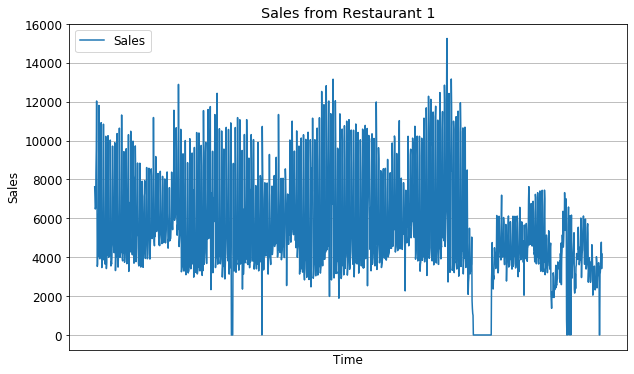

In [18]:
#Restaurant 1
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series_1.Date, series_1.Vendite_1, color='tab:blue', label='Sales')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales from Restaurant 1')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

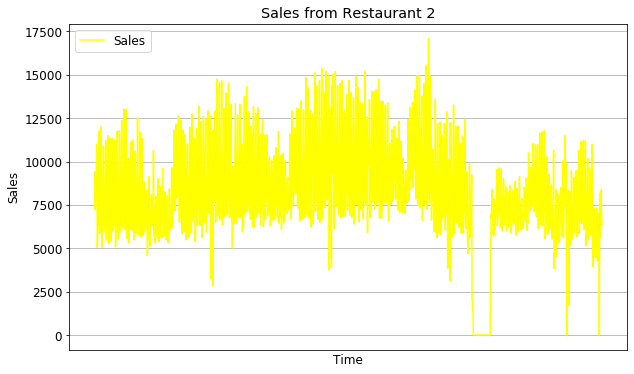

In [19]:
#Restaurant 1
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series_2.Date, series_2.Vendite_2, color='yellow', label='Sales')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales from Restaurant 2')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

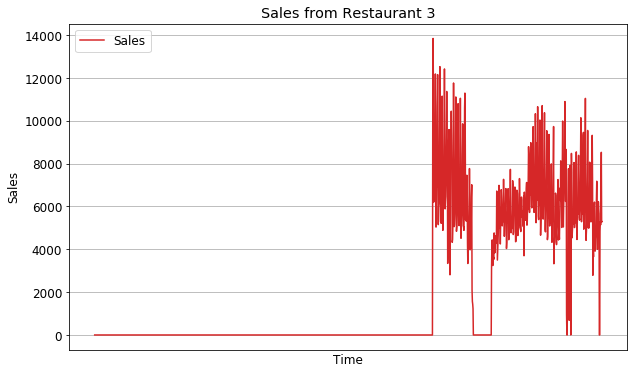

In [22]:
#Restaurant 3
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series_3.Date, series_3.Vendite_3, color='tab:red', label='Sales')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales from Restaurant 3')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

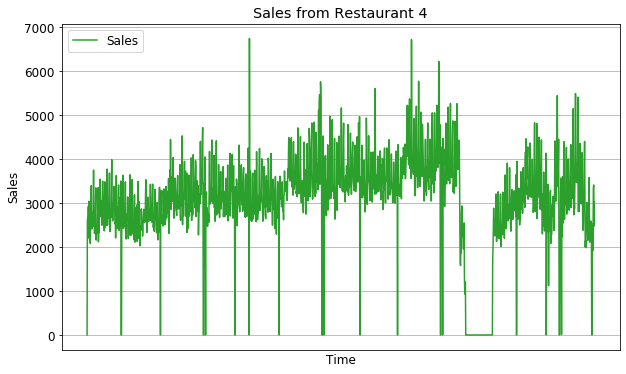

In [23]:
#Restaurant 4
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series_4.Date, series_4.Vendite_4, color='tab:green', label='Sales')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales from Restaurant 4')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

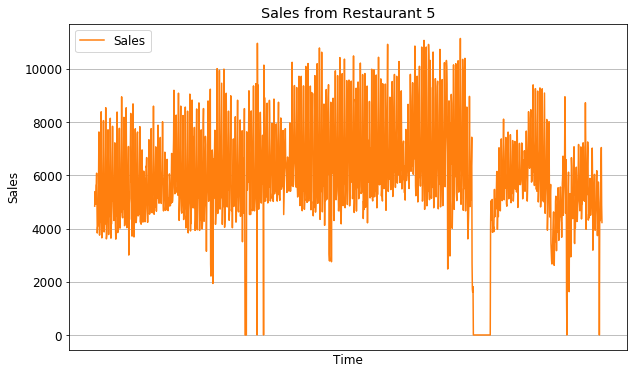

In [25]:
#Restaurant 5
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series_5.Date, series_5.Vendite_5, color='tab:orange', label='Sales')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales from Restaurant 5')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

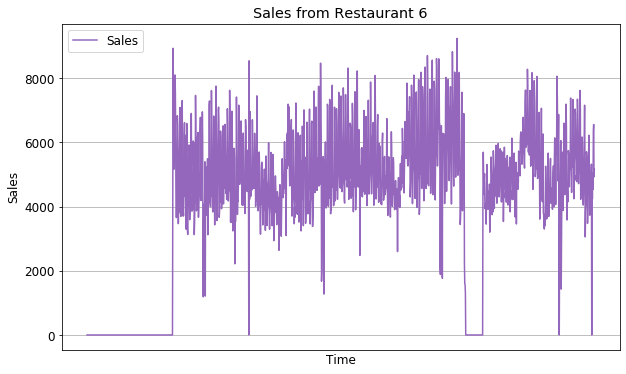

In [27]:
#Restaurant 6
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series_6.Date, series_6.Vendite_6, color='tab:purple', label='Sales')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales from Restaurant 6')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

In [25]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
series1 = pd.Series(data_cleaned["Vendite_1"])
print(series1.describe())

count     1563.000000
mean      5387.137524
std       2644.549809
min          0.000000
25%       3713.455000
50%       4690.550000
75%       6775.570000
max      15255.820000
Name: Vendite_1, dtype: float64


In [45]:
df5=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_5"]})
checkin_year_sigma_4 = df5.groupby(pd.Grouper(key="x_values",freq='1W')).mean()
df5=df5.set_index("x_values")

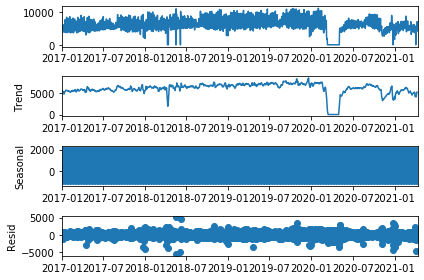

In [49]:
decompose_result = seasonal_decompose(df5,model="additive")
decompose_result.plot();

Restaurant 1

In [6]:
series1=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
series1=series1.set_index("x_values")
train=series1[:1302] #5/6 del dataset per tenere conto del covid
test=series1[1302:1563] #1/6 del dataset


In [ ]:
import pmdarima as pm

m1 = pm.auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                      start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      m=52,seasonal=True, error_action="warn",trace=True,supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=50
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=24209.399, Time=7.27 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=290.31 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=272.85 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=53.37 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=134.49 sec
